In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/Hrare2023/analysis/func_marti.cc","k")

Welcome to JupyROOT 6.28/00


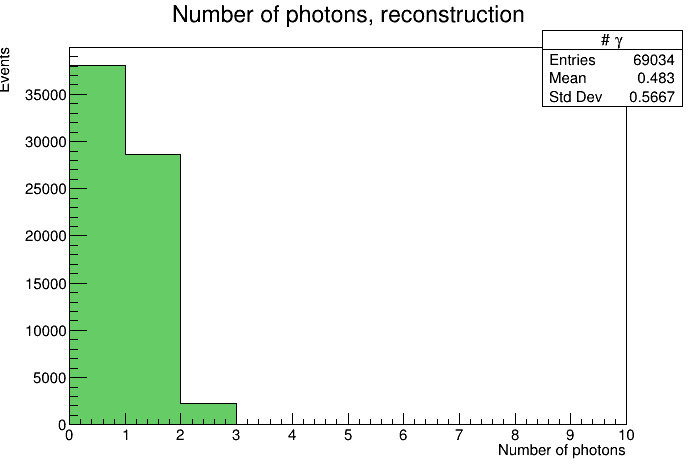

In [5]:
date = "MAY18"

chain = ROOT.TChain("events");
chain.Add("/home/submit/pdmonte/Hrare2023/analysis/outputs/{0}/2018/outname_mc1040_GFcat_OmegaCat_2018.root".format(date))

df = ROOT.RDataFrame(chain)

h = df.Histo1D(("# #gamma", "Number of photons, reconstruction", 10, 0, 10),"goodMeson_Nphotons")

h.GetXaxis().SetTitle("Number of photons")
h.GetYaxis().SetTitle("Events")

canvas = ROOT.TCanvas()

h.SetFillColor(ROOT.kGreen-6)
h.SetLineColor(ROOT.kBlack)
h.Draw("hist")

canvas.Draw()
#canvas.SaveAs("~/public_html/plotsMAY24/D0StarBKG_kin_mass.png")

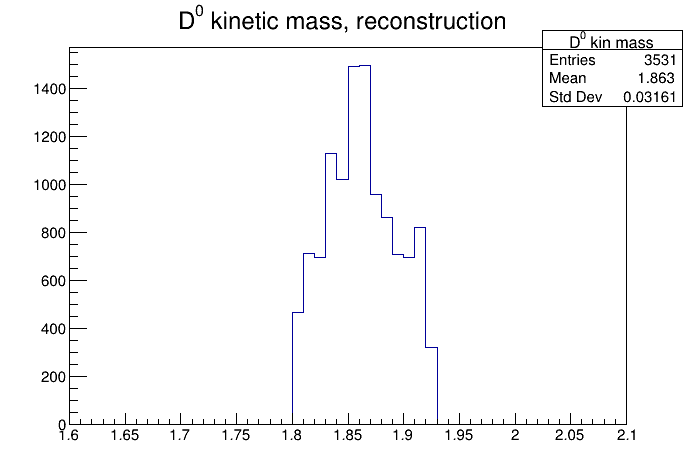

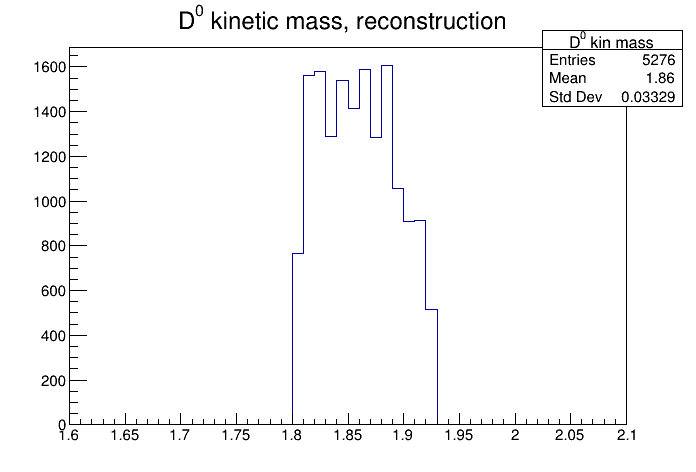

In [7]:
canvas = ROOT.TCanvas()
hBKG = dg.Define("scale", "w*lumiIntegrated")\
    .Define("goodMeson_mass_D0", "getValuesIdParticle(goodMeson_mass, GenPart_pdgId, 421, 1)")\
	.Histo1D(("D^{0} kin mass", "D^{0} kinetic mass, reconstruction", 50, 1.6, 2.1),"goodMeson_mass_D0", "scale")
hBKG.Draw("hist")
canvas.Draw()

canvas2 = ROOT.TCanvas()
hBKG2 = dg.Define("scale", "w*lumiIntegrated")\
    .Define("goodMeson_mass_D0", "getValuesIdParticle(goodMeson_mass, GenPart_pdgId, 421, 0)")\
	.Histo1D(("D^{0} kin mass", "D^{0} kinetic mass, reconstruction", 50, 1.6, 2.1),"goodMeson_mass_D0", "scale")
hBKG2.Draw("hist")
canvas2.Draw()